In [3]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2024/4_april/3_snowflake_snowpark/diamonds.csv'
res = requests.get(url, allow_redirects=True)
with open('diamonds.csv','wb') as file:
    file.write(res.content)
diamonds = pd.read_csv('diamonds.csv')

In [6]:
import os
from snowflake.snowpark import Session
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
connection_params = {
            "account": os.getenv('account_snow'),
            "user": os.getenv('user_snow'),
            "password":os.getenv('password_snow')
            #"role":"insert-role-here",
            #"warehouse":"insert-warehouse-here"
}

In [9]:
new_session = Session.builder.configs(connection_params).create()
new_session.get_current_user()

'"LINAGIOCONDA9"'

In [12]:
new_session.sql("USE DATABASE NEW_DB;").collect()

[Row(status='Statement executed successfully.')]

In [13]:
diamonds_df = new_session.table("diamonds")
diamonds_df.show(5)

-----------------------------------------------------------------------------------------------
|"CARAT"  |"CUT"    |"COLOR"  |"CLARITY"  |"DEPTH"  |"TABLE_"  |"PRICE"  |"X"   |"Y"   |"Z"   |
-----------------------------------------------------------------------------------------------
|0.23     |Ideal    |E        |SI2        |61.5     |55.0      |326      |3.95  |3.98  |2.43  |
|0.21     |Premium  |E        |SI1        |59.8     |61.0      |326      |3.89  |3.84  |2.31  |
|0.23     |Good     |E        |VS1        |56.9     |65.0      |327      |4.05  |4.07  |2.31  |
|0.29     |Premium  |I        |VS2        |62.4     |58.0      |334      |4.2   |4.23  |2.63  |
|0.31     |Good     |J        |SI2        |63.3     |58.0      |335      |4.34  |4.35  |2.75  |
-----------------------------------------------------------------------------------------------



In [14]:
import sys
sys.getsizeof(diamonds_df)

48

In [15]:
pandas_diamonds = diamonds_df.to_pandas()
pandas_diamonds.head()

,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE_,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
result = new_session.sql(
   """
   SELECT PRICE, CUT FROM DIAMONDS LIMIT 10
"""
)

type(result)


snowflake.snowpark.dataframe.DataFrame

In [18]:
result.show()

-----------------------
|"PRICE"  |"CUT"      |
-----------------------
|326      |Ideal      |
|326      |Premium    |
|327      |Good       |
|334      |Premium    |
|335      |Good       |
|336      |Very Good  |
|336      |Very Good  |
|337      |Very Good  |
|337      |Fair       |
|338      |Very Good  |
-----------------------



In [19]:
import snowflake.snowpark.functions as F

In [20]:
F.upper(F.col("CUT"))

Column(upper)

In [21]:
diamonds_df.show(5)

-----------------------------------------------------------------------------------------------
|"CARAT"  |"CUT"    |"COLOR"  |"CLARITY"  |"DEPTH"  |"TABLE_"  |"PRICE"  |"X"   |"Y"   |"Z"   |
-----------------------------------------------------------------------------------------------
|0.23     |Ideal    |E        |SI2        |61.5     |55.0      |326      |3.95  |3.98  |2.43  |
|0.21     |Premium  |E        |SI1        |59.8     |61.0      |326      |3.89  |3.84  |2.31  |
|0.23     |Good     |E        |VS1        |56.9     |65.0      |327      |4.05  |4.07  |2.31  |
|0.29     |Premium  |I        |VS2        |62.4     |58.0      |334      |4.2   |4.23  |2.63  |
|0.31     |Good     |J        |SI2        |63.3     |58.0      |335      |4.34  |4.35  |2.75  |
-----------------------------------------------------------------------------------------------



In [22]:
our_expression = F.upper(F.col("CUT"))
diamonds_df.select(our_expression).show()

--------------------
|"UPPER(""CUT"")"  |
--------------------
|IDEAL             |
|PREMIUM           |
|GOOD              |
|PREMIUM           |
|GOOD              |
|VERY GOOD         |
|VERY GOOD         |
|VERY GOOD         |
|FAIR              |
|VERY GOOD         |
--------------------



In [23]:
diamonds_df.filter(F.col("PRICE") > 10000).count()

5222

In [24]:
(
diamonds_df.with_column("PRICE_SQUARED", F.col("PRICE") ** 2)
.select("PRICE", "PRICE_SQUARED")
.show(5)
)

-----------------------------
|"PRICE"  |"PRICE_SQUARED"  |
-----------------------------
|326      |106276.0         |
|326      |106276.0         |
|327      |106929.0         |
|334      |111556.0         |
|335      |112225.0         |
-----------------------------



In [25]:
sample = diamonds_df.sample(0.25).to_pandas()
sample.head()

,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE_,PRICE,X,Y,Z
0,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
1,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
2,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
3,0.23,Very Good,H,VS1,61.0,57.0,353,3.94,3.96,2.41
4,0.23,Very Good,G,VVS2,60.4,58.0,354,3.97,4.01,2.41


In [26]:
sample.columns = [col.lower() for col in sample.columns]
sample.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table_', 'price', 'x',
       'y', 'z'],
      dtype='object')

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

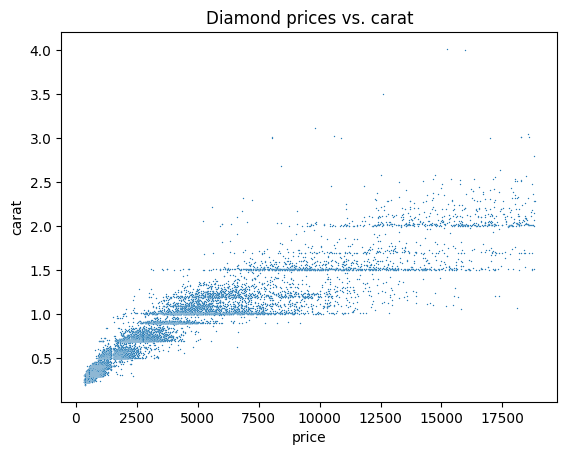

In [41]:
#Remember we imported seaborn as sns
sns.scatterplot(data=sample, x="price", y="carat", s=1)
plt.title("Diamond prices vs. carat")
plt.show()

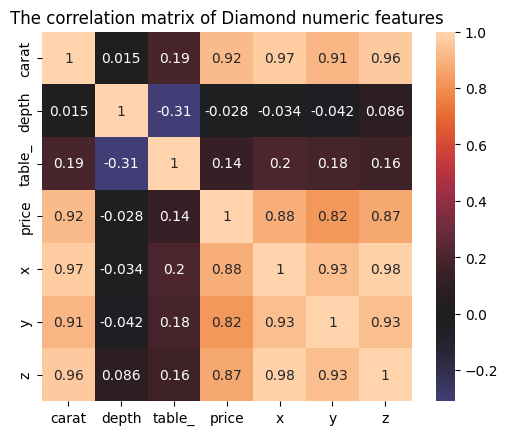

In [42]:
corr_matrix = sample.corr(numeric_only=True)
sns.heatmap(corr_matrix, center=0, square=True, annot=True)
plt.title("The correlation matrix of Diamond numeric features")
plt.show()

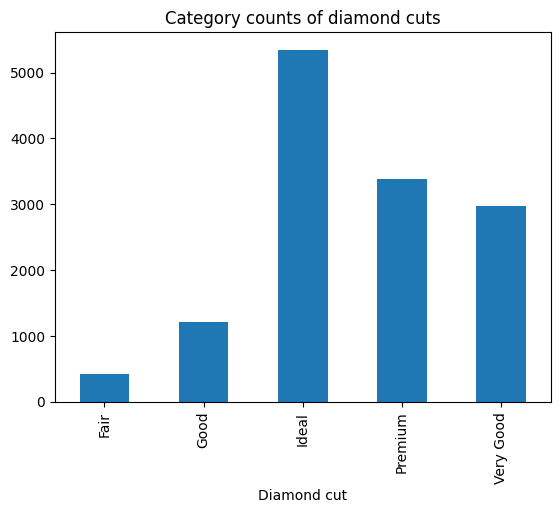

In [43]:
cut_counts = sample.groupby("cut")["cut"].count()
cut_counts.plot(kind="bar")
plt.title("Category counts of diamond cuts")
plt.xlabel("Diamond cut")
plt.show()

In [37]:
result = new_session.sql(
   """
   SELECT cut, COUNT(*) AS count
     FROM diamonds
    GROUP BY cut;
"""
)


In [38]:
result_pd = result.to_pandas()
result_pd

,CUT,COUNT
0,Ideal,21551
1,Premium,13791
2,Good,4906
3,Fair,1610
4,Very Good,12082


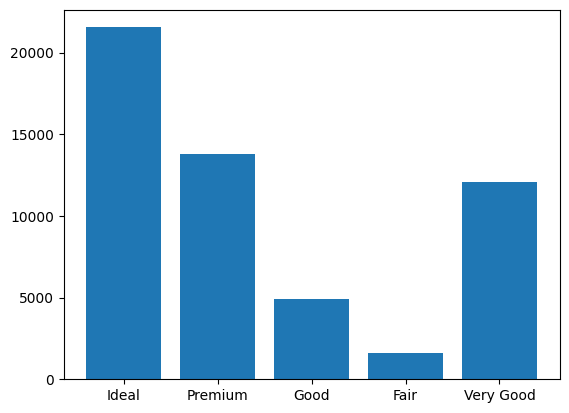

In [44]:
plt.bar(x=result_pd["CUT"], height=result_pd["COUNT"])
plt.show()

In [45]:
list(diamonds_df.schema)

[StructField('CARAT', DoubleType(), nullable=True),
 StructField('CUT', StringType(255), nullable=True),
 StructField('COLOR', StringType(255), nullable=True),
 StructField('CLARITY', StringType(255), nullable=True),
 StructField('DEPTH', DoubleType(), nullable=True),
 StructField('TABLE_', DoubleType(), nullable=True),
 StructField('PRICE', LongType(), nullable=True),
 StructField('X', DoubleType(), nullable=True),
 StructField('Y', DoubleType(), nullable=True),
 StructField('Z', DoubleType(), nullable=True)]

In [46]:
diamonds_df.columns

['CARAT', 'CUT', 'COLOR', 'CLARITY', 'DEPTH', 'TABLE_', 'PRICE', 'X', 'Y', 'Z']

In [47]:
from snowflake.snowpark.types import DoubleType

numeric_features = ["CARAT", "X", "Y", "Z", "DEPTH", "TABLE_"]
for col in numeric_features:
   diamonds_df = diamonds_df.with_column(col, diamonds_df[col].cast(DoubleType()))

list(diamonds_df.select(*numeric_features))

[Column("CARAT"),
 Column("X"),
 Column("Y"),
 Column("Z"),
 Column("DEPTH"),
 Column("TABLE_")]

In [48]:
import snowflake.snowpark.functions as F

def remove_space_and_upper(df):
   df = df.with_column("CUT", F.upper(F.replace(F.col("CUT"), " ", "_")))

   return df

diamonds_df = remove_space_and_upper(diamonds_df)


In [49]:
diamonds_df.write.mode("overwrite").save_as_table("diamonds_cleaned")

In [50]:
clean_df = new_session.table("diamonds_cleaned")
clean_df.show()

-------------------------------------------------------------------------------------------------
|"COLOR"  |"CLARITY"  |"PRICE"  |"CARAT"  |"X"   |"Y"   |"Z"   |"DEPTH"  |"TABLE_"  |"CUT"      |
-------------------------------------------------------------------------------------------------
|E        |SI2        |326      |0.23     |3.95  |3.98  |2.43  |61.5     |55.0      |IDEAL      |
|E        |SI1        |326      |0.21     |3.89  |3.84  |2.31  |59.8     |61.0      |PREMIUM    |
|E        |VS1        |327      |0.23     |4.05  |4.07  |2.31  |56.9     |65.0      |GOOD       |
|I        |VS2        |334      |0.29     |4.2   |4.23  |2.63  |62.4     |58.0      |PREMIUM    |
|J        |SI2        |335      |0.31     |4.34  |4.35  |2.75  |63.3     |58.0      |GOOD       |
|J        |VVS2       |336      |0.24     |3.94  |3.96  |2.48  |62.8     |57.0      |VERY_GOOD  |
|I        |VVS1       |336      |0.24     |3.95  |3.98  |2.47  |62.3     |57.0      |VERY_GOOD  |
|H        |SI1      